In [ ]:
# %cd ~/Minh\ Hieu

In [ ]:
%cd /media/truong/New Volume/DONE/Projects/Covid CT-base Classification/Implementation/2. Binary Classification

/media/truong/New Volume/DONE/Projects/Covid CT-base Classification/Implementation/2. Binary Classification


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
def get_scores(data, key):
  data_class = []
  data_mask = []
  signal = "STOP"

  for line in data:
    line = line.strip()
    if signal == "START":
      if "[Classification]" in line:
        elements = line.split(",")
        scores_class = [float(element.split(" ")[-1]) for element in elements]
        data_class.append(scores_class)
      if "[Segmentation]" in line:
        elements = line.split(",")
        scores_mask = [float(element.split(" ")[-1]) for element in elements]
        data_mask.append(scores_mask)
        signal = "STOP"
    if key in line:
      signal = "START"
      epoch = int((line.split(" ")[-1])[:-1])

  return np.array(data_class), np.array(data_mask)

In [ ]:
def parse_data (file_path):
  file = open(file_path, "r")
  data = file.read().split("\n")[1:]
  file.close()

  train_data_class, train_data_mask = get_scores(data, "[TRAIN]")
  eval_data_class, eval_data_mask = get_scores(data, "[EVAL]")
  test_data_class, test_data_mask = get_scores(data, "[TEST]")

  return train_data_class, train_data_mask, eval_data_class, eval_data_mask, test_data_class, test_data_mask

In [ ]:
def sub_visual(x, ys, margin, graph_name, indices, is_finish, is_margin=True):
  global LABELS
  fig = plt.figure(figsize=(10, 10))
  plt.title(graph_name)
  plt.xlabel('Epoch')
  for i in indices:
    y = ys[i]
    if margin[0] == 1:
      y_interest_index = np.argmax(y)
    else:
      y_interest_index = np.argmin(y)
    plt.text(x[y_interest_index], y[y_interest_index], f"{y[y_interest_index]:.2f}", size = 'large')
    plt.scatter(x[y_interest_index], y[y_interest_index], s=50)
    plt.plot(x, y, label = LABELS[i])
  if is_margin:
    plt.plot(x, margin)
  plt.legend()
  if is_finish:
    global out_dir
    plt.savefig(f"{out_dir}/{graph_name}.png")
  plt.show()

In [ ]:
def visual(data, is_finish=False):
  global LABELS
  LABELS = ["Classification Loss", "Classification Accuracy (Train)", "Classification Dice Score (Train)",
            "Segmentation Loss", "Segmentation Accuracy (Train)", "Segmentation Dice Score (Train)",
            "Classification Accuracy (Evaluation)", "Classification Dice Score (Evaluation)", "Classification F1 (Evaluation)",
            "Segmentation Accuracy (Evaluation)", "Segmentation Dice Score (Evaluation)",
            "Classification Accuracy (Test)", "Classification Dice Score (Test)", "Classification F1 (Test)",
            "Segmentation Accuracy (Test)", "Segmentation Dice Score (Test)"
            ]
  x = range(len(data))
  y0 = np.zeros_like(x)
  y1 = np.ones_like(x)
  ys =  []
  for i in range(data.shape[1]):
    y = data[:,i]
    if i != 0 and i != 3 and i != 8 and i != 13:
      y = y/100
    ys.append(y)

  sub_visual(x, ys, y0, "Training Loss", [0, 3], is_finish)
  sub_visual(x, ys, y1, "[Train & Evaluation] Classification Dice Score", [2, 7], is_finish)
  sub_visual(x, ys, y1, "[Train & Evaluation] Segmentation Dice Score", [5, 10], is_finish)
  sub_visual(x, ys, y1, "[Train & Evaluation] Classification Accuracy", [1, 6], is_finish)
  sub_visual(x, ys, y1, "[Train & Evaluation] Segmentation Accuracy", [4, 9], is_finish)

  if is_finish:
    sub_visual(x, ys, y1, "[Evaluation] Classification", [6, 7, 8], is_finish)
    sub_visual(x, ys, y1, "[Evaluation] Segmentation", [9, 10], is_finish)
    sub_visual(x, ys, y1, "[Test] Classification", [11, 12, 13], is_finish)
    sub_visual(x, ys, y1, "[Test] Segmentation", [14, 15], is_finish)
    sub_visual(x, ys, y1, "[Evaluation & Test] Classification Dice Score", [7, 12], is_finish)
    sub_visual(x, ys, y1, "[Evaluation & Test] Segmentation Dice Score", [10, 15], is_finish)

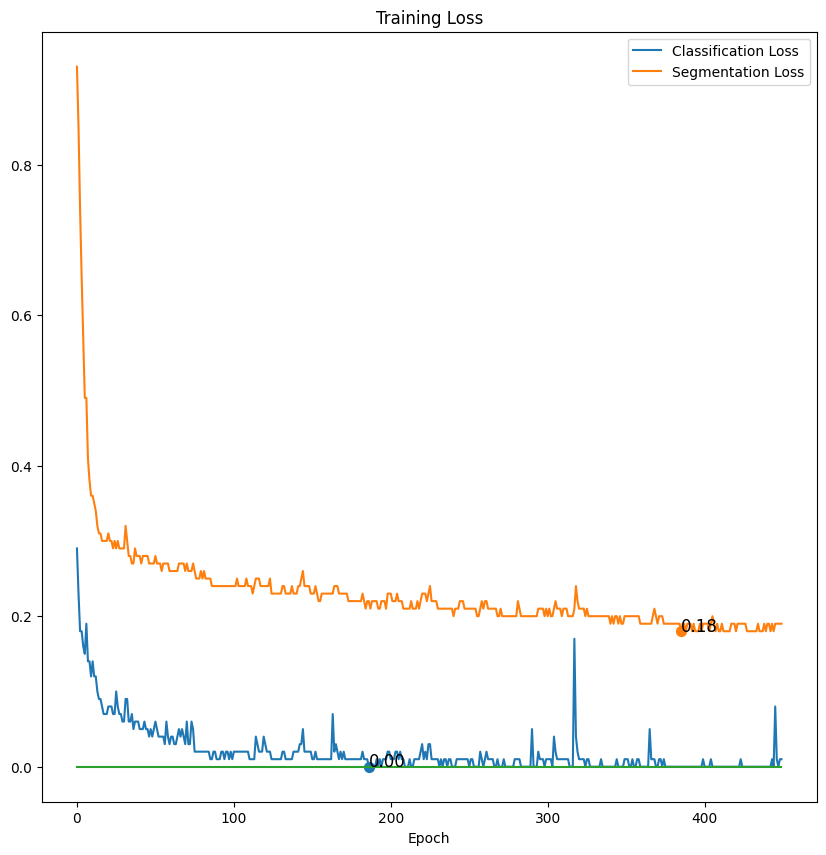

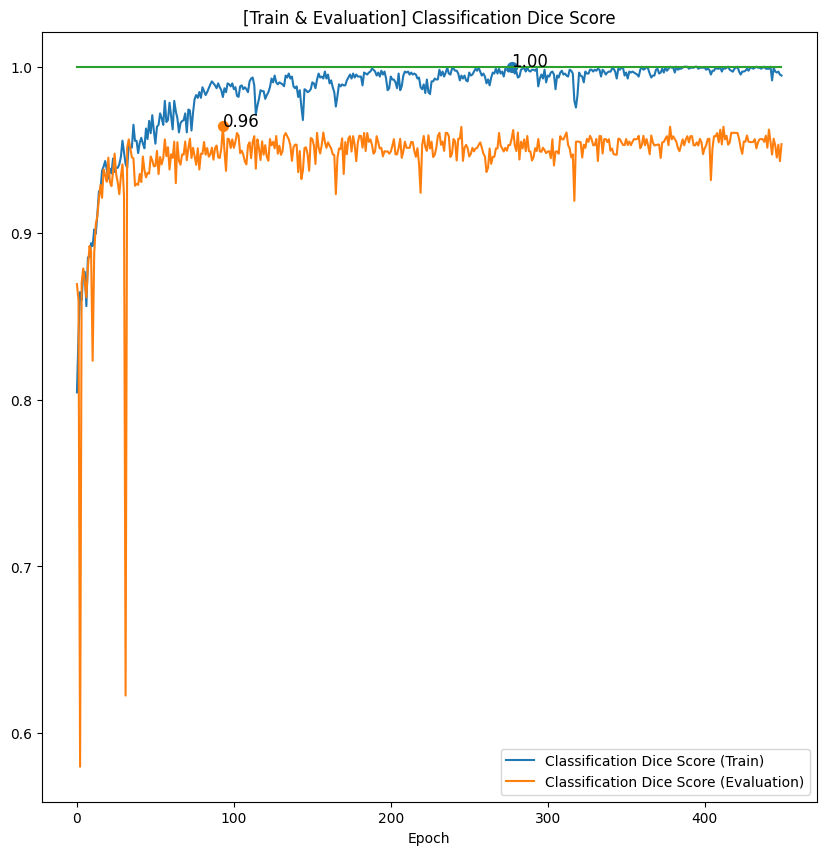

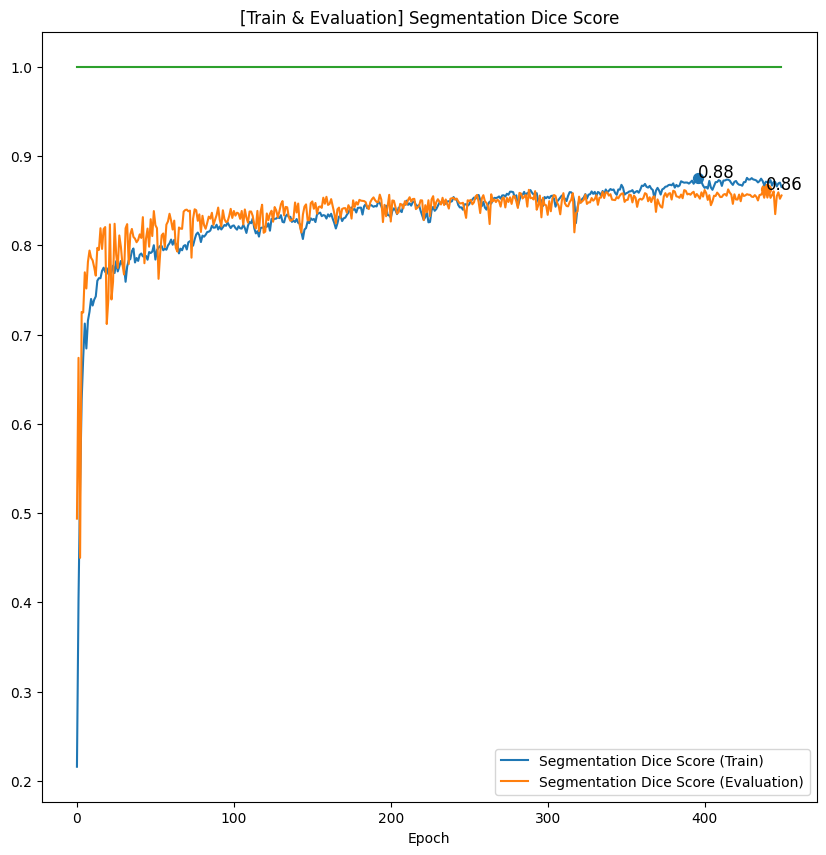

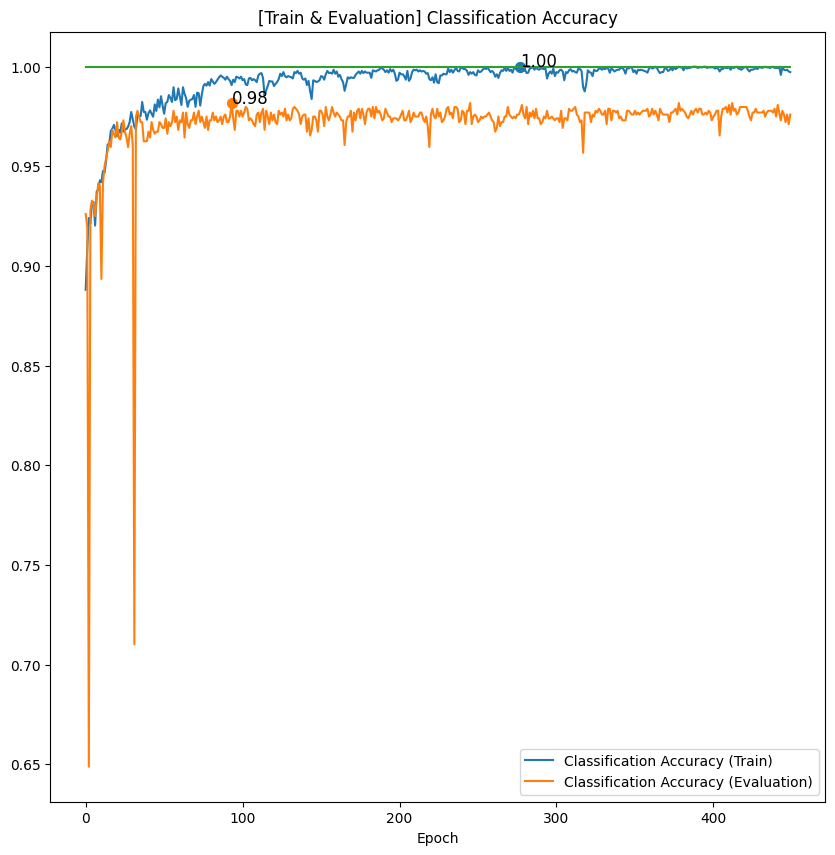

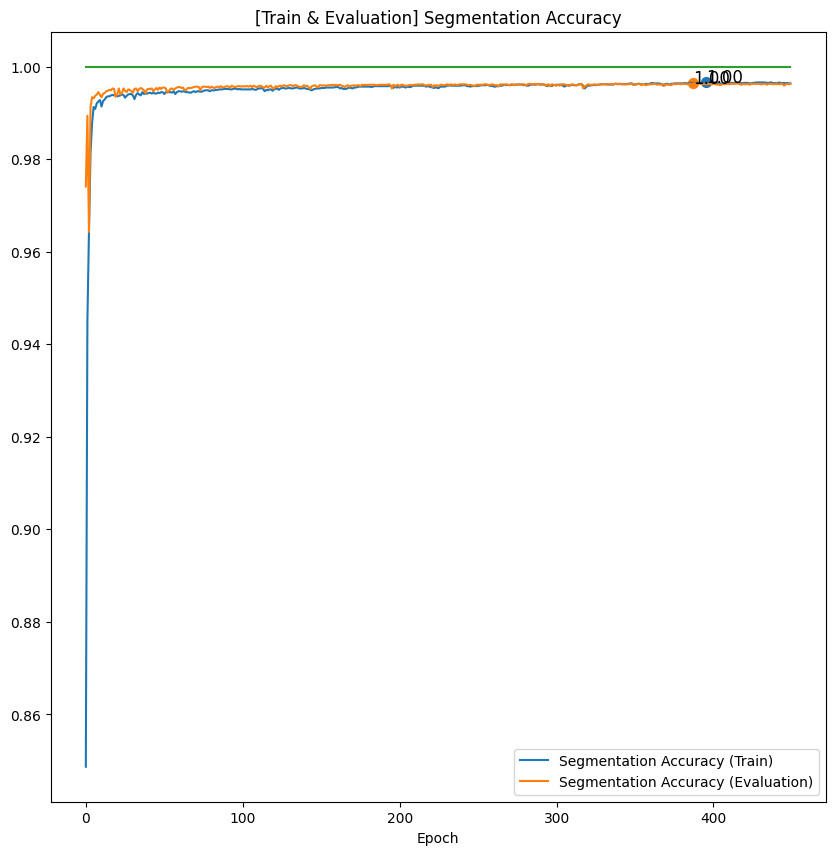

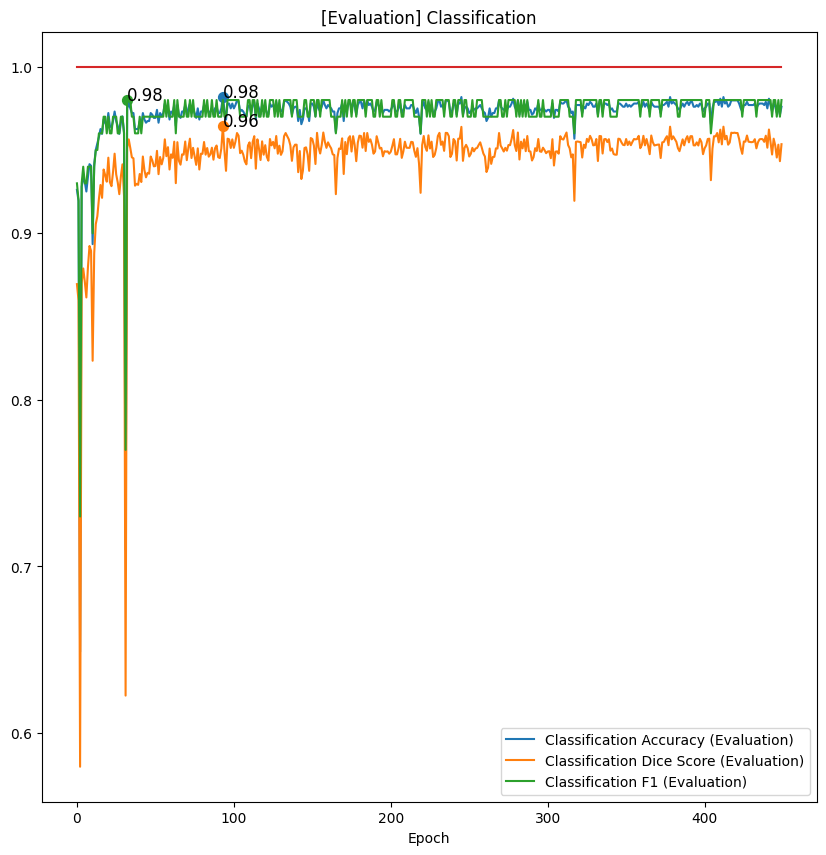

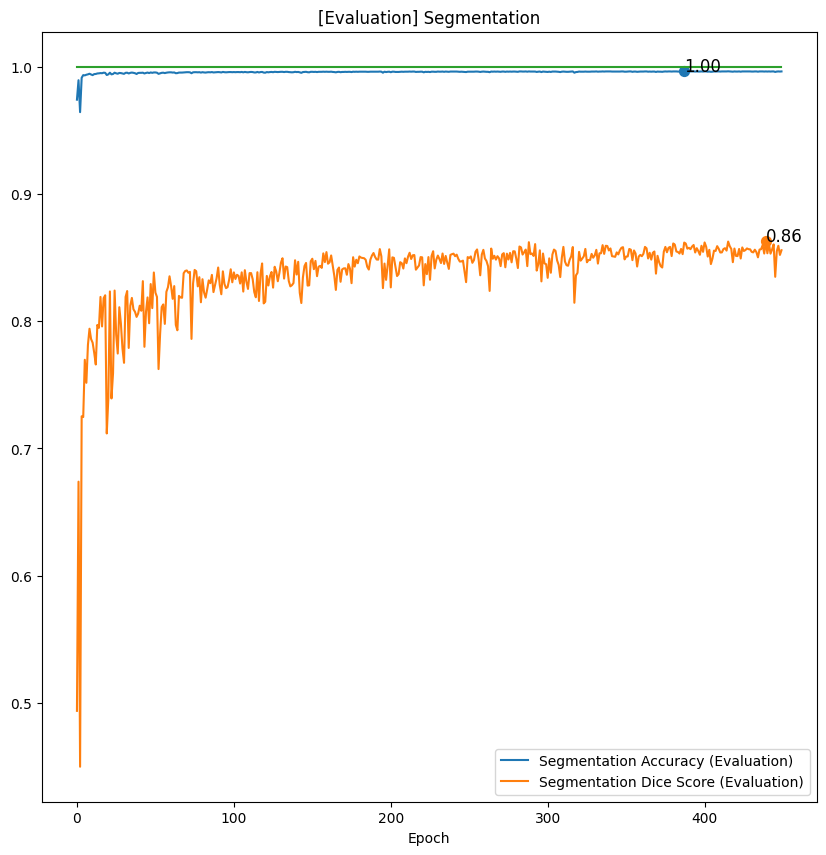

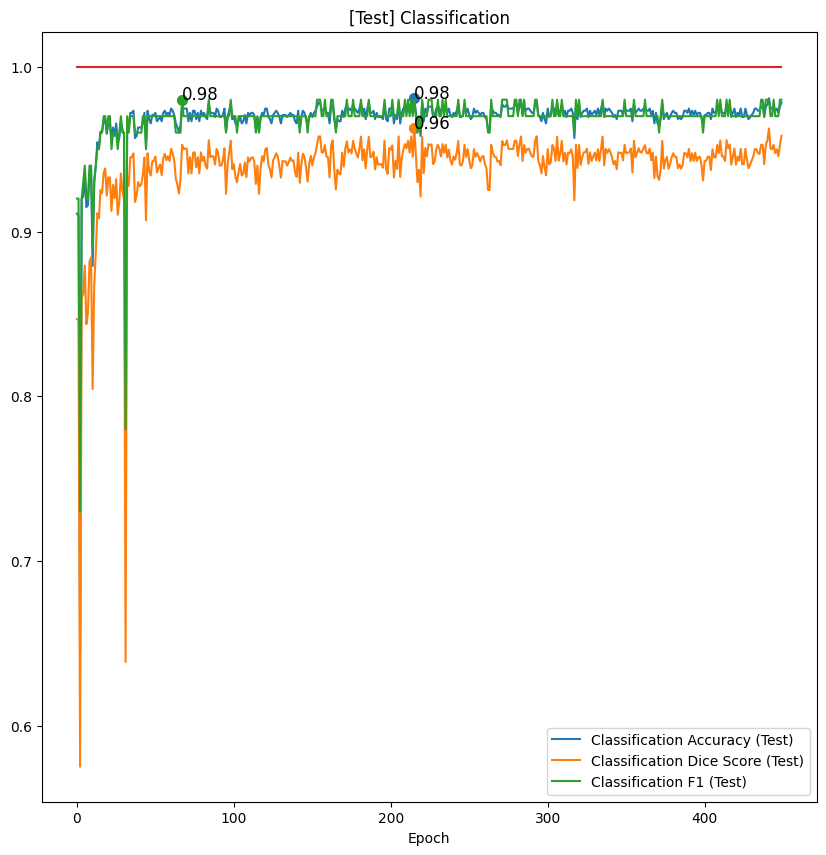

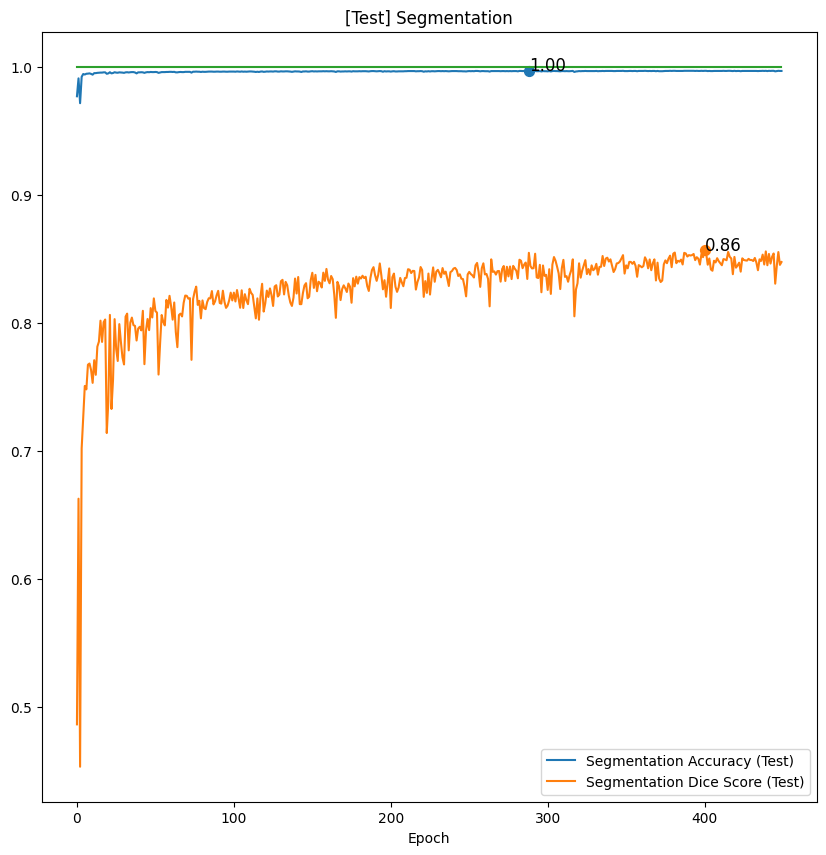

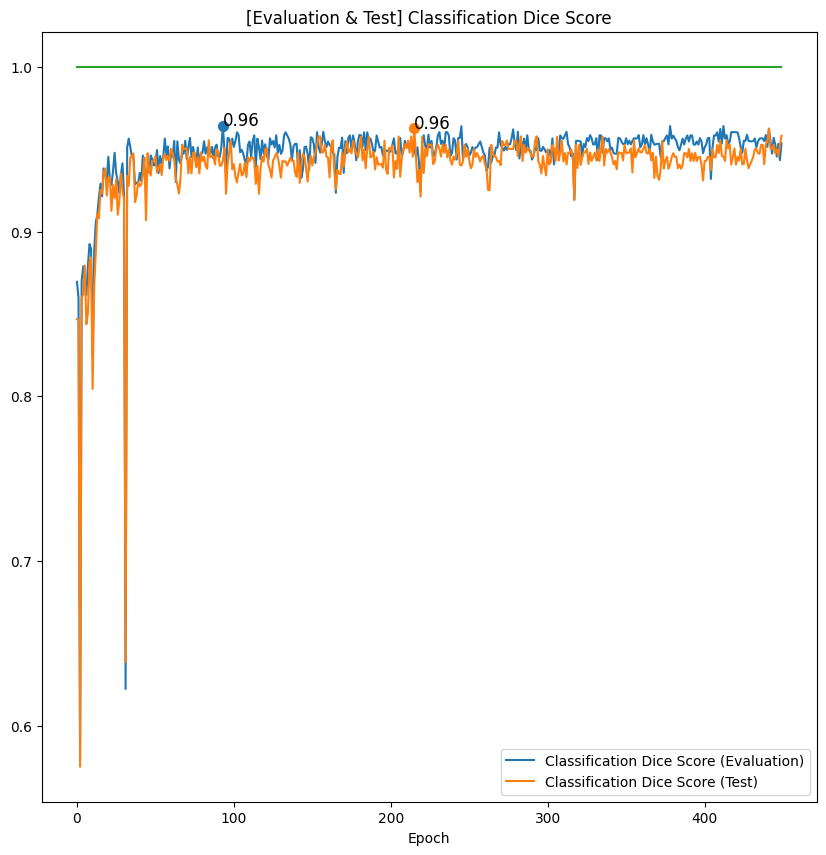

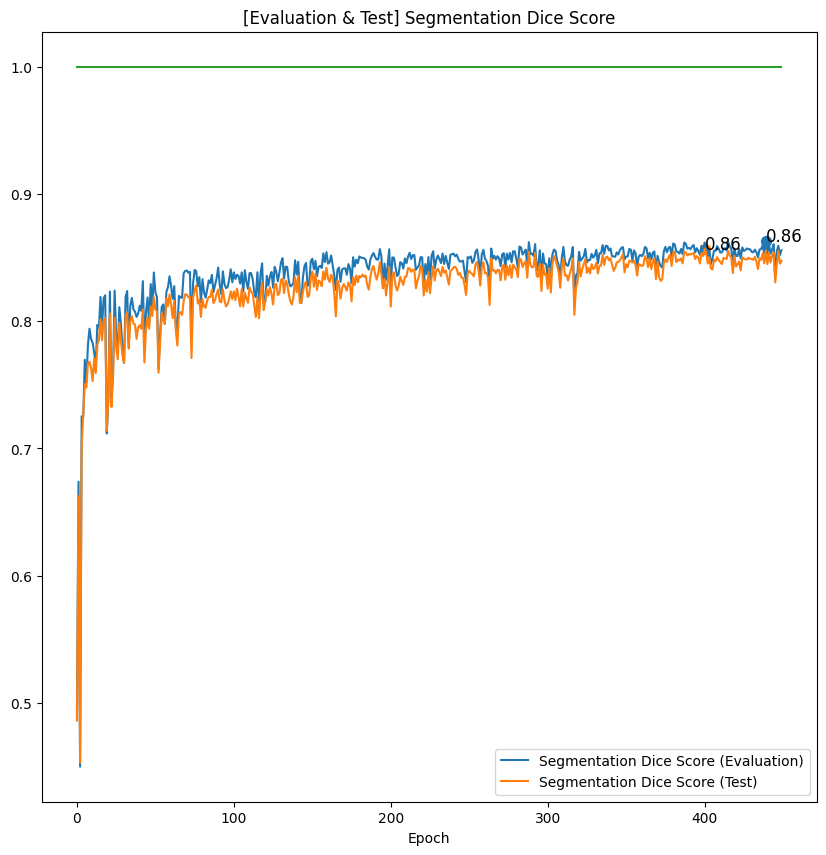

In [ ]:
# file_path = "Output/CutomCrAsppReUNetHU_YESLung_108E/train_log"
# file_path = "Output/CutomCrAsppReUNetPNG_YESLung_108E/train_log"

# file_path = "Output/OriginCrAsppReUNetHU_YESLung_108E/train_log"
# file_path = "Output/OriginCrAsppReUNetPNG_YESLung_108E/train_log"

# file_path = "Output/CRNetPNG_YESLung_50E_CAP/train_log"

# file_path = "Output/CutomCrAsppReUNetPNG_YESLung_108E_CAP/train_log"

##########################################
# file_path = "Final_Output/CRNet_HU_256/train_log"
# file_path = "Final_Output/CRNet_PNG_256/train_log"

# file_path = "Final_Output/XNet_PNG_256/train_log"
# file_path = "Final_Output/OriginalIncoNet_PNG_256/train_log"
# file_path = "Final_Output/XNet_HU_256/train_log"
# file_path = "Final_Output/OriginalIncoNet_HU_256/train_log"

# file_path = "Final_Output/XNet_CAP_HU_256/train_log"
# file_path = "Final_Output/XNet_CAP_PNG_256/train_log"

file_path = "Final_Output/XNet_512/train_log"

file_path = file_path.replace("Final_Output", "Model Results")
out_dir = file_path.replace("train_log", "graphs")
train_data_class, train_data_mask, eval_data_class, eval_data_mask, test_data_class, test_data_mask = parse_data (file_path)
# visual(np.concatenate((train_data_class, train_data_mask, eval_data_class, eval_data_mask), axis=1))                                                          #For training diagnosis
visual(np.concatenate((train_data_class, train_data_mask, eval_data_class, eval_data_mask, test_data_class, test_data_mask), axis=1), is_finish=True)         #For result diagnosis

In [ ]:
!nvidia-smi

Wed Jun 30 22:35:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 470.42.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   45C    P3    N/A /  N/A |    520MiB /  2000MiB |     11%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------